In [1]:
# imports

import pandas as pd
import matplotlib.pyplot  as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os.path
import jellyfish
import pickle

In [2]:
# function to sort dicts
def dict_sort(d, sort_on='keys', desc=False):
    if(sort_on == 'keys'):
        return {k: v for k, v in sorted(d.items(), key=lambda item: item[0], reverse=desc)}
    else:
        return {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=desc)}

In [3]:
# loading data

WeightingRules_filename = './WeightingRules.csv'
WeightingRules = None

if(os.path.exists(WeightingRules_filename)):
    WeightingRules = pd.read_csv(WeightingRules_filename)
    WeightingRules = WeightingRules.set_index(['WeightingRuleId'])

# Weighting Result
WeightingResults_filename = './WeightingResults.csv'
WeightingResults = None

if(os.path.exists(WeightingResults_filename)):
    WeightingResults = pd.read_csv(WeightingResults_filename)
    WeightingResults = WeightingResults.\
        set_index(['WeightingResultId','QualificationResultId', 'WeightingRuleId', 'WeightingResultTypeId',
       'TransactionLineId', 'QualifiedTransactionLineId', 'TransactionLineOperationId', 'CreatedTimeUtc'])    

# Qualification Results
QualificationResults_filename = './QualificationResults.csv'
QualificationResults = None

if(os.path.exists(QualificationResults_filename)):
    QualificationResults = pd.read_csv(QualificationResults_filename)
    QualificationResults = QualificationResults.\
        set_index(['QualificationResultId','TransactionLineId', 'QualifiedTransactionLineId',
       'TransactionLineOperationId', 'SupplierTrustLevelId',
       'SupplierMatchLevelId', 'BuyerMatchLevelId', 'ConsumerNameTrustLevelId',
       'ConsumerNameMatchLevelId', 'ConsumerFirstNameMatchLevelId',
       'ConsumerLastNameMatchLevelId', 'ConsumerFirstNameAliasMatchLevelId',
       'GenderMatchLevelId', 'DedupeTransactionReferenceMatchLevelId',
       'TransactionReferenceMatchLevelId',
       'TransactionGroupReferenceMatchLevelId',
       'TransactionBatchReferenceMatchLevelId', 'SourceSubMatchLevelId',
       'DateMatchLevelId'])        

# Matching Results
MatchingResults_filename = './MatchingResults.csv'
MatchingResults = None

if(os.path.exists(MatchingResults_filename)):
    MatchingResults = pd.read_csv(MatchingResults_filename)
    MatchingResults = MatchingResults.\
        set_index(['MatchingResultId', 'TransactionLineId', 'MatchedTransactionLineId', 'WeightingRank']) 

# Transaction Line Details
TransactionLineDetails_filename = './TransactionLineDetails.csv'
TransactionLineDetails = None

if(os.path.exists(TransactionLineDetails_filename)):
    TransactionLineDetails = pd.read_csv(TransactionLineDetails_filename)
    TransactionLineDetails = TransactionLineDetails\
        .set_index(["TransactionLineId", 'ConsumerFirstNameNormalized', 'ConsumerLastNameNormalized', 'SupplierCountryCode', 'BuyerCode'])

C:\Users\ali.karooni\AppData\Local\Temp\ipykernel_28696\2426189192.py:52: DtypeWarning: Columns (3,4,5,12,20,21,22,23,28,29,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  TransactionLineDetails = pd.read_csv(TransactionLineDetails_filename)


In [15]:
WeightingRules[WeightingRules['WeightingRulesetId']==2]

,Rank,SupplierMatchLevelId,ConsumerTrustLevelId,ConsumerMatchLevelId,ConsumerFirstNameMatchLevelId,ConsumerLastNameMatchLevelId,ConsumerFirstNameAliasMatchLevelId,GenderMatchLevelId,DedupeTransactionReferenceMatchLevelId,TransactionReferenceMatchLevelId,TransactionGroupReferenceMatchLevelId,TransactionBatchReferenceMatchLevelId,SourceSubMatchLevelId,DateMatchLevelId,BuyerMatchLevelId,Description,CreatedTime,WeightingRulesetId,Active
WeightingRuleId,,,,,,,,,,,,,,,,,,,
1025,1,10,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,60,10,NaN,8/27/2021 3:46:32 PM,2,1
1026,2,10,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,60,20,NaN,8/27/2021 3:46:32 PM,2,1
1027,3,10,10.0,20.0,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,60,10,NaN,8/27/2021 3:46:32 PM,2,1
1028,4,10,10.0,10.0,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,60,30,NaN,8/27/2021 3:46:32 PM,2,1
1029,5,10,10.0,20.0,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,60,20,NaN,8/27/2021 3:46:32 PM,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,120,10,NaN,NaN,20.0,10.0,10.0,NaN,NaN,30,NaN,NaN,NaN,30,20,NaN,8/27/2021 3:46:32 PM,2,1
1145,121,10,NaN,NaN,30.0,10.0,10.0,NaN,NaN,30,NaN,NaN,NaN,30,10,NaN,8/27/2021 3:46:32 PM,2,1
1146,122,10,NaN,NaN,30.0,10.0,10.0,NaN,NaN,30,NaN,NaN,NaN,30,20,NaN,8/27/2021 3:46:32 PM,2,1


In [35]:
QualificationResults

,,,,,,,,,,,,,,,,,,,IsSelected,CreatedTime
QualificationResultId,TransactionLineId,QualifiedTransactionLineId,TransactionLineOperationId,SupplierTrustLevelId,SupplierMatchLevelId,BuyerMatchLevelId,ConsumerNameTrustLevelId,ConsumerNameMatchLevelId,ConsumerFirstNameMatchLevelId,ConsumerLastNameMatchLevelId,ConsumerFirstNameAliasMatchLevelId,GenderMatchLevelId,DedupeTransactionReferenceMatchLevelId,TransactionReferenceMatchLevelId,TransactionGroupReferenceMatchLevelId,TransactionBatchReferenceMatchLevelId,SourceSubMatchLevelId,DateMatchLevelId,,
383523187,357224255,357222206,394933446,10,10,10,40,30,30,30,30,10,20,20,30,30,10,40,0,1/1/2023 12:02:52 AM
383523188,357224253,357223968,394933448,10,10,10,40,30,30,30,30,20,30,20,30,30,10,10,0,1/1/2023 12:02:52 AM
383523189,357224251,357223970,394933451,10,10,10,40,30,30,30,30,10,30,30,30,30,10,10,0,1/1/2023 12:02:53 AM
383523190,357224251,357223309,394933451,10,10,10,40,30,30,30,30,10,30,30,30,30,10,40,0,1/1/2023 12:02:53 AM
383523191,357224278,357222004,394933478,10,10,10,10,10,10,10,10,40,10,10,10,30,10,10,0,1/1/2023 12:02:55 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403524121,361394847,361394854,399316712,10,10,10,10,10,10,10,10,40,30,30,30,10,10,40,0,1/26/2023 12:02:57 PM
403524122,361394903,359655577,399316749,10,10,20,40,30,30,30,30,10,30,30,30,30,10,70,0,1/26/2023 12:02:57 PM
403524123,361394847,348698170,399316712,10,10,20,10,10,10,10,10,40,10,10,30,30,30,10,1,1/26/2023 12:02:57 PM


In [4]:
lst = list()
lst.append([QualificationResults.groupby('SupplierTrustLevelId').size(), 'SupplierTrust'])
lst.append([QualificationResults.groupby('SupplierMatchLevelId').size(), 'SupplierMatch'])
lst.append([QualificationResults.groupby('BuyerMatchLevelId').size(), 'BuyerMatch'])
lst.append([QualificationResults.groupby('ConsumerNameTrustLevelId').size(),'ConsumerNameTrust'])
lst.append([QualificationResults.groupby('ConsumerNameMatchLevelId').size(),'ConsumerNameMatch'])
lst.append([QualificationResults.groupby('ConsumerFirstNameMatchLevelId').size(),'ConsumerFirstNameMatch'])
lst.append([QualificationResults.groupby('ConsumerLastNameMatchLevelId').size(), 'ConsumerLastNameMatch'])
lst.append([QualificationResults.groupby('ConsumerFirstNameAliasMatchLevelId').size(),'ConsumerFirstNameAliasMatch'])
lst.append([QualificationResults.groupby('GenderMatchLevelId').size(),'GenderMatch'])
lst.append([QualificationResults.groupby('DedupeTransactionReferenceMatchLevelId').size(),'DedupeTransactionReferenceMatch'])
lst.append([QualificationResults.groupby('TransactionReferenceMatchLevelId').size(),'TransactionReferenceMatch'])
lst.append([QualificationResults.groupby('TransactionGroupReferenceMatchLevelId').size(),'TransactionGroupReferenceMatch'])
lst.append([QualificationResults.groupby('TransactionBatchReferenceMatchLevelId').size(),'TransactionBatchReferenceMatch'])
lst.append([QualificationResults.groupby('SourceSubMatchLevelId').size(),'SourceSubMatch'])
lst.append([QualificationResults.groupby('DateMatchLevelId').size(),'DateMatch'])

labels = [item[1] for item in lst]
x10 = [item[0][10] if (10 in list(item[0].keys())) else 0 for item in lst]
x20 = [item[0][20] if (20 in list(item[0].keys())) else 0 for item in lst]
x30 = [item[0][30] if (30 in list(item[0].keys())) else 0 for item in lst]
x40 = [item[0][40] if (40 in list(item[0].keys())) else 0 for item in lst]
datematches50 = [item[0][50] if (50 in list(item[0].keys())) else 0 for item in lst]
datematches60 = [item[0][60] if (60 in list(item[0].keys())) else 0 for item in lst]
datematches70 = [item[0][70] if (70 in list(item[0].keys())) else 0 for item in lst]

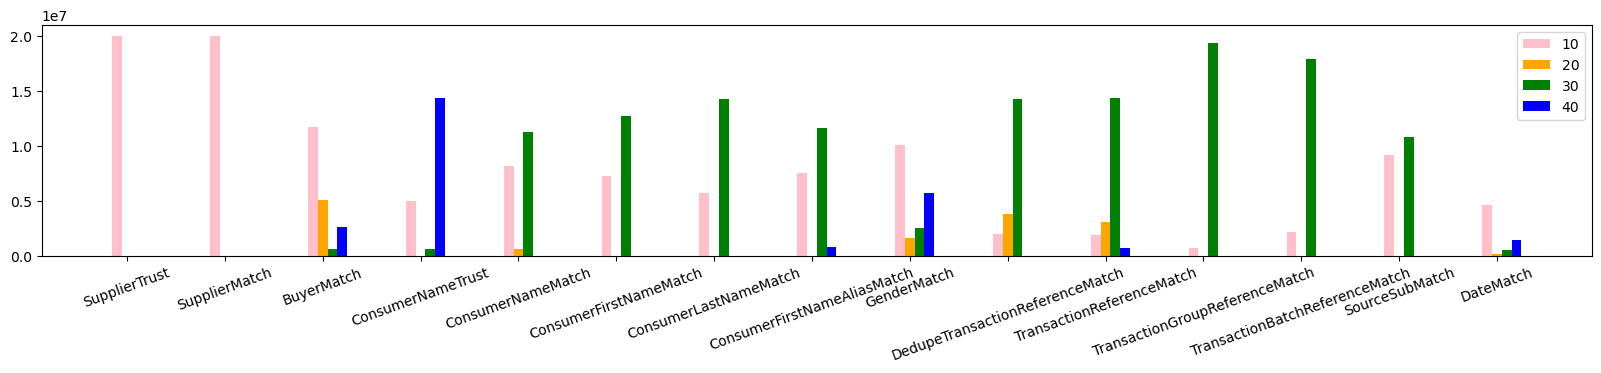

In [5]:
x = np.arange(15)
width = 0.1

fig = plt.figure(figsize=(20, 3))
ax = fig.subplots()
plt.xticks(x, labels, rotation=20)
ax.bar(x-0.1, x10, width, color='pink')
ax.bar(x    , x20, width, color='orange')
ax.bar(x+0.1, x30, width, color='green')
ax.bar(x+0.2, x40, width, color='blue')
ax.legend(["10", "20", "30", "40"])
plt.show()

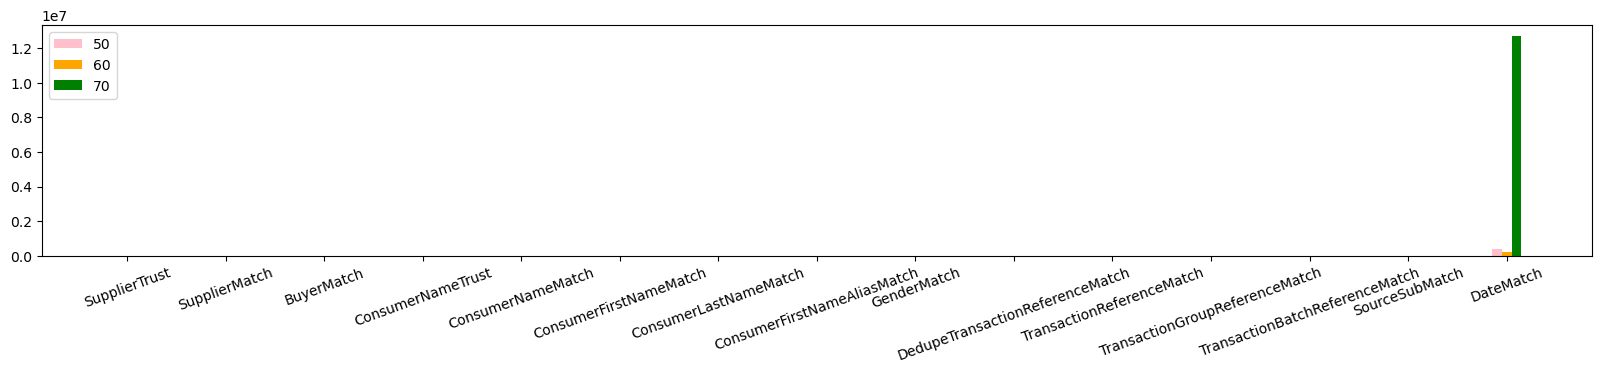

In [6]:
x = np.arange(15)
width = 0.1

fig = plt.figure(figsize=(20, 3))
ax = fig.subplots()
plt.xticks(x, labels, rotation=20)
ax.bar(x-0.1, datematches50, width, color='pink')
ax.bar(x    , datematches60, width, color='orange')
ax.bar(x+0.1, datematches70, width, color='green')
ax.legend(["50", "60", "70"])
plt.show()

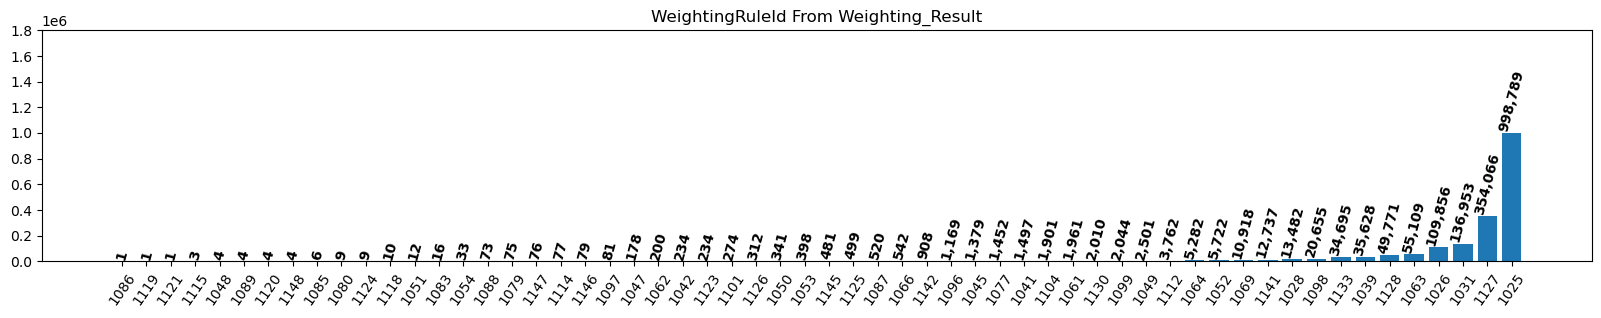

In [7]:
WeightingResult_grouped = WeightingResults.groupby('WeightingRuleId').size()
weightingrulesset2 = WeightingRules[WeightingRules['WeightingRulesetId'] == 2]

weightingrules_usedin_weightingresult = {}
for k, v in WeightingResult_grouped.items():
    if(int(k) in list(weightingrulesset2.index)):
        weightingrules_usedin_weightingresult[str(int(k))]=v

weightingrules_usedin_weightingresult_sorted = dict_sort(weightingrules_usedin_weightingresult, 'values')

keys = list(weightingrules_usedin_weightingresult_sorted.keys())
values = list(weightingrules_usedin_weightingresult_sorted.values())

# Create a bar plot
plt.figure(figsize=(20, 3))
plt.bar(keys, values)
plt.xticks(keys, rotation=55)
plt.yticks(range(0, 2000000, 200000))

# plt.xlabel('Keys')
# plt.ylabel('Values')
plt.title('WeightingRuleId From Weighting_Result')

# Add values on top of each bar
for i, value in enumerate(values):
    plt.text(i, value, '{:,}'.format(value), ha='center', va='bottom', fontweight='bold', 
             rotation=75)

# Display the plot
plt.show()

{1086: 0, 1119: 2, 1121: 2, 1115: 9, 1048: 28, 1089: 3, 1120: 12, 1148: 6, 1085: 7, 1080: 13, 1124: 19, 1118: 19, 1051: 59, 1083: 22, 1054: 114, 1088: 57, 1079: 57, 1147: 64, 1114: 147, 1146: 68, 1097: 70, 1047: 383, 1062: 466, 1042: 668, 1123: 76, 1101: 816, 1126: 142, 1050: 784, 1053: 960, 1145: 355, 1125: 351, 1087: 153, 1066: 472, 1142: 1015, 1096: 240, 1045: 4754, 1077: 1251, 1041: 3439, 1104: 3619, 1061: 6054, 1130: 3291, 1099: 5399, 1049: 7858, 1112: 4705, 1064: 5248, 1052: 18734, 1069: 12192, 1141: 16178, 1028: 41652, 1098: 36556, 1133: 46486, 1039: 108898, 1128: 76077, 1063: 53149, 1026: 270699, 1031: 268257, 1127: 559285, 1025: 3201106}


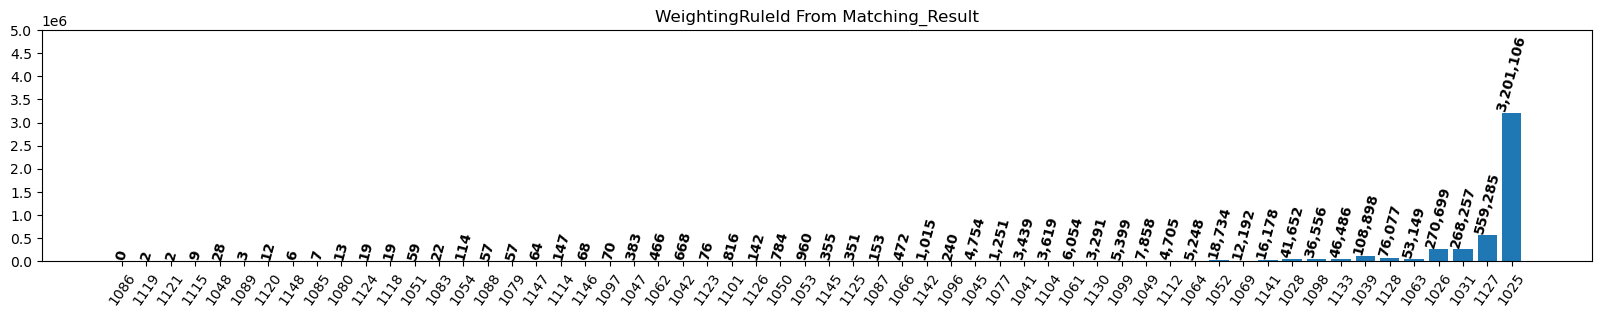

In [8]:
MatchingResults_grouped = MatchingResults.groupby('WeightingRank').size()
weightingrulesset2 = WeightingRules[WeightingRules['WeightingRulesetId'] == 2]

weightingrules_usedin_matchingresult = {int(k):0 for k,v in weightingrules_usedin_weightingresult_sorted.items()}
for k, v in MatchingResults_grouped.items():
    if(int(k) in list(weightingrulesset2['Rank'])):
        weightingreuleid = weightingrulesset2[weightingrulesset2['Rank'] == int(k)].index.values[0]
        weightingrules_usedin_matchingresult[weightingreuleid]=v


x = [str(x) for x in weightingrules_usedin_matchingresult.keys()]
y = [int(x) for x in weightingrules_usedin_matchingresult.values()]
print(weightingrules_usedin_matchingresult)

# Create a bar plot
plt.figure(figsize=(20, 3))
plt.bar(x, y)
plt.xticks(x, rotation=55)
plt.yticks(range(0, 5000001, 500000))

# plt.xlabel('Keys')
# plt.ylabel('Values')
plt.title('WeightingRuleId From Matching_Result')

# Add values on top of each bar
for i, value in enumerate(y):
    plt.text(i, value, '{:,}'.format(value), ha='center', va='bottom', fontweight='bold', rotation=75)

# Display the plot
plt.show()

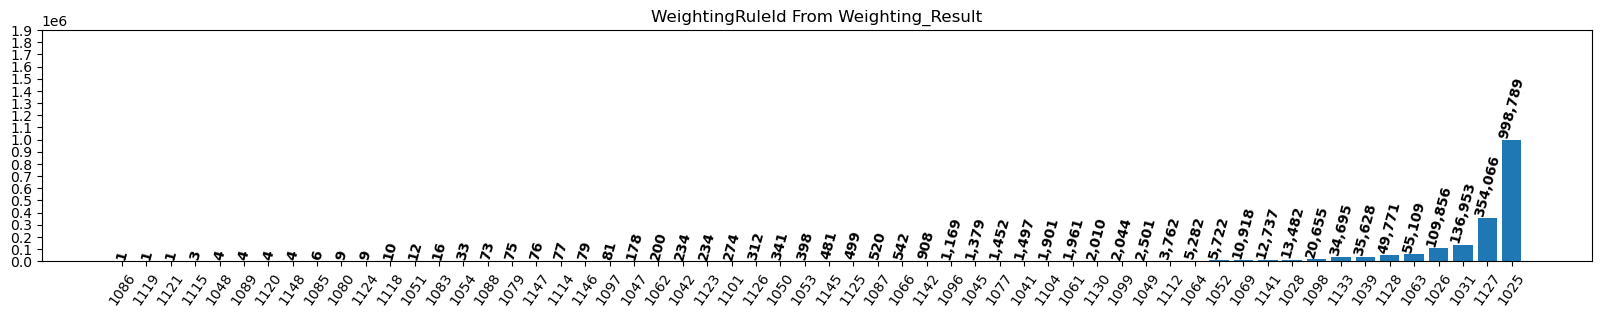

In [9]:
WeightingResult_grouped = WeightingResults.groupby('WeightingRuleId').size()
weightingrulesset2 = WeightingRules[WeightingRules['WeightingRulesetId'] == 2]

weightingrules_usedin_weightingresult = {}
for k, v in WeightingResult_grouped.items():
    if(int(k) in list(weightingrulesset2.index)):
        weightingrules_usedin_weightingresult[str(int(k))]=v

weightingrules_usedin_weightingresult_sorted = dict_sort(weightingrules_usedin_weightingresult, 'values')

keys = list(weightingrules_usedin_weightingresult_sorted.keys())
values = list(weightingrules_usedin_weightingresult_sorted.values())

# Create a bar plot
plt.figure(figsize=(20, 3))
plt.bar(keys, values)
plt.xticks(keys, rotation=55)
plt.yticks(range(0, 2000000, 100000))

# plt.xlabel('Keys')
# plt.ylabel('Values')
plt.title('WeightingRuleId From Weighting_Result')

# Add values on top of each bar
for i, value in enumerate(values):
    plt.text(i, value, '{:,}'.format(value), ha='center', va='bottom', fontweight='bold', 
             rotation=75)

# Display the plot
plt.show()

In [10]:
print('TransactionLineId in WeightingResults:',WeightingResults.groupby('TransactionLineId').size().shape)
print('QualifiedTransactionLineId in WeightingResults:',WeightingResults.groupby('QualifiedTransactionLineId').size().shape)

print('TransactionLineId in MatchingResults:', MatchingResults.groupby('TransactionLineId').size().shape)
print('MatchedTransactionLineId in MatchingResults:', MatchingResults.groupby('MatchedTransactionLineId').size().shape)

TransactionLineId in WeightingResults: (2722995,)
QualifiedTransactionLineId in WeightingResults: (8583628,)
TransactionLineId in MatchingResults: (17522137,)
MatchedTransactionLineId in MatchingResults: (5741141,)


In [ ]:
TransactionLineDetails = TransactionLineDetails.reset_index()
TransactionLineDetails = TransactionLineDetails.set_index('TransactionLineId')
WeightingResults = WeightingResults.reset_index()

In [ ]:
inner_join = pd.merge(WeightingResults, TransactionLineDetails, \
             left_on='TransactionLineId', right_on='TransactionLineId', suffixes=('_wr', '_tld'))

In [ ]:
inner_join = pd.merge(inner_join, TransactionLineDetails, \
             left_on='QualifiedTransactionLineId', right_on='TransactionLineId', suffixes=('_wr', '_qtld'))

In [ ]:
inner_join.columns

In [ ]:
inner_join_weightingtuleid1025 = inner_join[inner_join['WeightingRuleId']==1025]

In [ ]:
inner_join_weightingtuleid1025_grouped_BuyerName_wr =\
      inner_join_weightingtuleid1025.groupby('BuyerName_wr').agg(count=('BuyerName_wr', 'count'))
inner_join_weightingtuleid1025_grouped_BuyerName_wr[inner_join_weightingtuleid1025_grouped_BuyerName_wr['count']>10000]

In [ ]:
inner_join_weightingtuleidNOT1025 = inner_join[inner_join['WeightingRuleId']!=1025]
inner_join_weightingtuleidNOT1025_grouped_BuyerName_wr =\
      inner_join_weightingtuleidNOT1025.groupby('BuyerName_wr').agg(count=('BuyerName_wr', 'count'))
inner_join_weightingtuleidNOT1025_grouped_BuyerName_wstr(str(r[inner_join_weightingtuleidNOT1025_grouped_BuyerName_wr['count']>100000]

In [ ]:
inner_join_grouped = inner_join.groupby('TransactionLineId').\
    agg(count=('TransactionLineId', 'count'), WeightingResultId=('WeightingResultId','first'))

In [ ]:
inner_join_grouped_candidate = inner_join_grouped[inner_join_grouped['count']>2]

In [ ]:
# WeightingResults = WeightingResults.set_index('WeightingResultId')
# TransactionLineDetails = TransactionLineDetails.set_index('TransactionLineId')

In [ ]:
for index,row in inner_join_grouped_candidate.iterrows():
    print(row['WeightingResultId'])
    wr = WeightingResults.loc[row['WeightingResultId']]
    print(TransactionLineDetails.loc[wr['TransactionLineId']])
    print(TransactionLineDetails.loc[wr['QualifiedTransactionLineId']])
    break

In [ ]:
# Sample DataFrames
df1 = pd.DataFrame({'key1': ['A', 'B', 'C', 'D'],
                    'value': [1, 2, 3, 4]})
df2 = pd.DataFrame({'key2': ['B', 'D', 'E', 'F'],
                    'value': [5, 6, 7, 8]})

# Merge DataFrames using different key columns and add suffixes to overlapping column names
merged_df = pd.merge(df1, df2, left_on='key1', right_on='key2', suffixes=('_df1', '_df2'))

print(merged_df)

In [ ]:
weightingresults_ids = []
for index, row in WeightingResults.iterrows():
    tid = index[4]
    qtid = index[5]
    if(TransactionLineDetails[TransactionLineDetails.index.get_level_values('TransactionLineId') == tid].shape[0] > 0 and
       TransactionLineDetails[TransactionLineDetails.index.get_level_values('TransactionLineId') ==qtid].shape[0] > 0):
       weightingresults_ids.append(index)

In [ ]:
temp = TransactionLineDetails.groupby('TransactionLineId').agg(count=('TransactionLineId', 'count'))
temp[temp['count']>1]

In [ ]:
TransactionLineDetails.columns

In [ ]:
# WeightingResults = TransactionLineDetails.reset_index()
TransactionLineDetails = TransactionLineDetails.reset_index()

In [ ]:
weightingresult_1025 = WeightingResults[WeightingResults.index.get_level_values('WeightingRuleId') == 1025]
weightingresult_1025_groupby_TransactionLineId = weightingresult_1025.groupby('TransactionLineId').size()

In [ ]:
weightingresult_1025_groupby_TransactionLineId.

In [ ]:
for k, v in weightingresult_1025_groupby_TransactionLineId.items():    
    if(TransactionLineDetails[TransactionLineDetails.index.get_level_values('TransactionLineId') == k].shape[0] >= 1):
        print(k)
        x = weightingresult_1025[weightingresult_1025.index.get_level_values('TransactionLineId')==k].index.get_level_values('QualifiedTransactionLineId')
        # print(TransactionLineDetails.loc[TransactionLineDetails.index.get_level_values('TransactionLineId') == k])
        print(x)
        break

In [ ]:
TransactionLineDetails[TransactionLineDetails.index.get_level_values('TransactionLineId') == 356735211].shape

In [ ]:
WeightingResults[WeightingResults.index.get_level_values('CreatedTimeUtc') < '1/1/2023']

In [ ]:
MatchingResults[MatchingResults['CreatedTimeUtc'] < '1/1/2023']

In [ ]:
sum(weightingrules_usedin_weightingresult_sorted.values())

In [ ]:
WeightingRules = WeightingRules.reset_index()
MatchingResults = MatchingResults.reset_index()

In [ ]:
print(WeightingRules.columns)
print(WeightingRules.index.names)


In [ ]:
print(MatchingResults.columns)
print(MatchingResults.index.names)

In [ ]:
inner_join = pd.merge(MatchingResults, WeightingRules, left_on='WeightingRank', right_on='Rank', suffixes=('_left', '_right'), how='left')

In [ ]:
print(inner_join.columns)
print(inner_join.index.names)

In [ ]:
temp = inner_join[inner_join['WeightingRulesetId'] == 2]
inner_join_groupby_WeightingRuleId = temp.groupby('WeightingRuleId').size()


In [4]:
QualificationResults.reset_index(inplace=True)

In [19]:
QualificationResults['GroupKey'] = \
QualificationResults[['SupplierTrustLevelId', 'SupplierMatchLevelId', 'BuyerMatchLevelId',
'ConsumerNameTrustLevelId', 'ConsumerNameMatchLevelId', 'ConsumerFirstNameMatchLevelId',
'ConsumerLastNameMatchLevelId', 'ConsumerFirstNameAliasMatchLevelId', 'GenderMatchLevelId',
'DedupeTransactionReferenceMatchLevelId', 'TransactionReferenceMatchLevelId', 'TransactionGroupReferenceMatchLevelId',
'TransactionBatchReferenceMatchLevelId', 'SourceSubMatchLevelId', 'DateMatchLevelId']]\
.apply(lambda row: '-'.join([str(value).lstrip().rstrip().replace('\n', '') for value in row.values]), axis=1)

In [21]:
QualificationResults_grouped = QualificationResults.groupby(['SupplierTrustLevelId', 'SupplierMatchLevelId', 'BuyerMatchLevelId', 'ConsumerNameTrustLevelId', 
'ConsumerNameMatchLevelId', 'ConsumerFirstNameMatchLevelId', 'ConsumerLastNameMatchLevelId', 'ConsumerFirstNameAliasMatchLevelId', 'GenderMatchLevelId',
'DedupeTransactionReferenceMatchLevelId', 'TransactionReferenceMatchLevelId', 'TransactionGroupReferenceMatchLevelId', 'TransactionBatchReferenceMatchLevelId',
 'SourceSubMatchLevelId', 'DateMatchLevelId']) .agg(count=('QualificationResultId', 'count'), groupkey=('GroupKey', 'first'))

In [22]:
QualificationResults_grouped[QualificationResults_grouped['count']>200000]

count  \
SupplierTrustLevelId SupplierMatchLevelId BuyerMatchLevelId ConsumerNameTrustLevelId ConsumerNameMatchLevelId ConsumerFirstNameMatchLevelId ConsumerLastNameMatchLevelId ConsumerFirstNameAliasMatchLevelId GenderMatchLevelId DedupeTransactionReferenceMatchLevelId TransactionReferenceMatchLevelId TransactionGroupReferenceMatchLevelId TransactionBatchReferenceMatchLevelId SourceSubMatchLevelId DateMatchLevelId           
10                   10                   10                10                       10                       10                            10                           10                                 10                 10                                     10                               10                                    30                                    30                    10                283018   
                                                                                                                                                                                                                                                                                                       30                                    30                                    30                    10                653184   
                                                                                                                                                                                                                               30                                     30                               30                                    30                                    10                    70                420687   
                                                                                                                                                                                                                                                                                                                                                                                   30                    70                314916   
                                                            40                       30                       30                            30                           30                                 10                 30                                     30                               30                                    30                                    10                    70                369025   
                                                                                                                                                                                                                                                                                                                                                                                   30                    70                290210   
                                                                                                                                                                                                            40                 30                                     30                               30                                    30                                    10                    70                368250   
                                                                                                                                                                                                                                                                                                                                                                                   30                    70                212713   
                                          20                40                       30                       30                            30                           30                               

In [30]:
WeightingResults.head()

,,,,,,,,PostMatchingProcessingResultsId
WeightingResultId,QualificationResultId,WeightingRuleId,WeightingResultTypeId,TransactionLineId,QualifiedTransactionLineId,TransactionLineOperationId,CreatedTimeUtc,
383422797,383523187,NaN,20,357224255,357222206,394933446,1/1/2023 12:02:52 AM,0
383422798,383523188,NaN,20,357224253,357223968,394933448,1/1/2023 12:02:52 AM,0
383422799,383523190,NaN,20,357224251,357223309,394933451,1/1/2023 12:02:53 AM,0
383422800,383523189,NaN,20,357224251,357223970,394933451,1/1/2023 12:02:53 AM,0
383422801,383523195,NaN,20,357224239,357223933,394933440,1/1/2023 12:02:55 AM,0


In [105]:
temp_WeightingResults.head()

,WeightingResultId,WeightingRuleId,WeightingResultTypeId,TransactionLineId,QualifiedTransactionLineId,TransactionLineOperationId,CreatedTimeUtc,PostMatchingProcessingResultsId
QualificationResultId,,,,,,,,
383523212,383422820,6.0,10,357224274,356991134,394933474,1/1/2023 12:02:58 AM,0
383523210,383422821,6.0,10,357224274,356998485,394933474,1/1/2023 12:02:58 AM,0
383523209,383422822,1.0,10,357224274,357223101,394933474,1/1/2023 12:02:58 AM,0
383523227,383422838,1.0,10,357224268,357222604,394933468,1/1/2023 12:03:00 AM,0
383523224,383422843,1.0,10,357224270,357222605,394933466,1/1/2023 12:03:00 AM,0


In [99]:
temp_WeightingResults = WeightingResults[WeightingResults['WeightingRuleId'].astype(str) != 'nan']
temp_WeightingResults.set_index(['QualificationResultId'], inplace=True)

In [108]:
temp_WeightingResults.loc[383523212]

WeightingResultId                             383422820
WeightingRuleId                                     6.0
WeightingResultTypeId                                10
TransactionLineId                             357224274
QualifiedTransactionLineId                    356991134
TransactionLineOperationId                    394933474
CreatedTimeUtc                     1/1/2023 12:02:58 AM
PostMatchingProcessingResultsId                       0
Name: 383523212, dtype: object

In [122]:
WeightingRules['WeightingRulesetId']==1
WeightingRules.loc[7]

Rank                                                                             180
SupplierMatchLevelId                                                              10
ConsumerTrustLevelId                                                            10.0
ConsumerMatchLevelId                                                            10.0
ConsumerFirstNameMatchLevelId                                                    NaN
ConsumerLastNameMatchLevelId                                                     NaN
ConsumerFirstNameAliasMatchLevelId                                               NaN
GenderMatchLevelId                                                               NaN
DedupeTransactionReferenceMatchLevelId                                          10.0
TransactionReferenceMatchLevelId                                                  10
TransactionGroupReferenceMatchLevelId                                            NaN
TransactionBatchReferenceMatchLevelId                            

In [125]:
k = 0
weightingrules_groupkey = {}
weightingrules_in_QRID = {}
for g in QualificationResults_grouped.iterrows():
    groupkey = g[1][1]
    temp = QualificationResults[QualificationResults['GroupKey'] == groupkey]
    qualificationIds = temp['QualificationResultId'].values
    for value in qualificationIds:
        if(value in temp_WeightingResults.index):
            weightingrule = temp_WeightingResults.loc[value]['WeightingRuleId'] 
            weightingruleset = WeightingRules.loc[weightingrule]['WeightingRulesetId']

            if(weightingruleset == 1): continue
            if(weightingrules_groupkey.get(weightingrule, None) == None):
                weightingrules_groupkey[weightingrule] = set()
                weightingrules_groupkey[weightingrule].add(groupkey)
            else:
                weightingrules_groupkey[weightingrule].add(groupkey)

            if(weightingrules_in_QRID.get(weightingrule, None) == None):
                weightingrules_in_QRID[weightingrule] = set()
                weightingrules_in_QRID[weightingrule].add(value)
            else:
                weightingrules_in_QRID[weightingrule].add(value)

In [128]:
pickle.dump(weightingrules_groupkey, open('./weightingrules_groupkey.bin', 'w+b'))

In [4]:
weightingrules_groupkey = pickle.load(open('./weightingrules_groupkey.bin', 'r+b'))

In [5]:
weightingrules_groupkey_count = {}
for k, v in weightingrules_groupkey.items():
    weightingrules_groupkey_count[k] = len(v)

In [6]:
dict_sort(weightingrules_groupkey_count, 'values', desc=True)

{1127.0: 344,
 1025.0: 295,
 1141.0: 287,
 1039.0: 212,
 1063.0: 204,
 1128.0: 190,
 1026.0: 140,
 1142.0: 120,
 1052.0: 119,
 1064.0: 114,
 1133.0: 112,
 1061.0: 97,
 1069.0: 95,
 1077.0: 93,
 1041.0: 87,
 1098.0: 81,
 1031.0: 69,
 1096.0: 60,
 1028.0: 60,
 1130.0: 58,
 1066.0: 45,
 1099.0: 42,
 1053.0: 40,
 1112.0: 38,
 1145.0: 34,
 1062.0: 31,
 1125.0: 28,
 1045.0: 27,
 1079.0: 27,
 1147.0: 24,
 1097.0: 24,
 1049.0: 23,
 1042.0: 19,
 1087.0: 17,
 1047.0: 17,
 1104.0: 17,
 1050.0: 14,
 1101.0: 14,
 1114.0: 13,
 1126.0: 13,
 1088.0: 13,
 1054.0: 11,
 1146.0: 10,
 1083.0: 6,
 1123.0: 6,
 1124.0: 5,
 1080.0: 5,
 1118.0: 4,
 1085.0: 4,
 1089.0: 3,
 1148.0: 2,
 1115.0: 2,
 1051.0: 2,
 1120.0: 1,
 1121.0: 1,
 1119.0: 1,
 1086.0: 1,
 1048.0: 1}

In [7]:
3**15

14348907

In [19]:
titles =  ['SupplierTrustLevelId', 'SupplierMatchLevelId', 'BuyerMatchLevelId', \
'ConsumerNameTrustLevelId', 'ConsumerNameMatchLevelId', 'ConsumerFirstNameMatchLevelId', \
'ConsumerLastNameMatchLevelId', 'ConsumerFirstNameAliasMatchLevelId', 'GenderMatchLevelId', \
'DedupeTransactionReferenceMatchLevelId', 'TransactionReferenceMatchLevelId', 'TransactionGroupReferenceMatchLevelId', \
'TransactionBatchReferenceMatchLevelId', 'SourceSubMatchLevelId', 'DateMatchLevelId']

In [9]:
weightingrules_groupkey[1127]

{'10-10-10-10-10-10-10-10-10-10-30-30-30-10-10',
 '10-10-10-10-10-10-10-10-10-10-30-30-30-30-10',
 '10-10-10-10-10-10-10-10-10-10-30-30-30-30-30',
 '10-10-10-10-10-10-10-10-10-20-30-30-30-10-10',
 '10-10-10-10-10-10-10-10-10-20-30-30-30-10-20',
 '10-10-10-10-10-10-10-10-10-20-30-30-30-10-30',
 '10-10-10-10-10-10-10-10-10-20-30-30-30-10-40',
 '10-10-10-10-10-10-10-10-10-20-30-30-30-30-10',
 '10-10-10-10-10-10-10-10-10-20-30-30-30-30-20',
 '10-10-10-10-10-10-10-10-10-20-30-30-30-30-30',
 '10-10-10-10-10-10-10-10-10-20-30-30-30-30-40',
 '10-10-10-10-10-10-10-10-10-30-30-30-30-10-10',
 '10-10-10-10-10-10-10-10-10-30-30-30-30-10-20',
 '10-10-10-10-10-10-10-10-10-30-30-30-30-10-30',
 '10-10-10-10-10-10-10-10-10-30-30-30-30-10-40',
 '10-10-10-10-10-10-10-10-10-30-30-30-30-30-10',
 '10-10-10-10-10-10-10-10-10-30-30-30-30-30-20',
 '10-10-10-10-10-10-10-10-10-30-30-30-30-30-30',
 '10-10-10-10-10-10-10-10-10-30-30-30-30-30-40',
 '10-10-10-10-10-10-10-10-20-10-30-30-30-30-10',
 '10-10-10-10-10-10-

In [34]:
weightingrules_groupkey_distinct = {}
for item in list(weightingrules_groupkey[1025]):
    sp = str(item).split('-')
    for i, s in enumerate(sp):
        if(s == 0): print('err')
        if(weightingrules_groupkey_distinct.get(i, None) == None): 
            weightingrules_groupkey_distinct[i] = {}
        
        if(weightingrules_groupkey_distinct[i].get(s, None) == None):
            weightingrules_groupkey_distinct[i][s] = 1
        weightingrules_groupkey_distinct[i][s] += 1

for i, item in enumerate(titles):
    print(item + '\t\t\t', dict_sort(weightingrules_groupkey_distinct[i], 'keys', desc=False))

SupplierTrustLevelId			 {'10': 296}
SupplierMatchLevelId			 {'10': 296}
BuyerMatchLevelId			 {'10': 296}
ConsumerNameTrustLevelId			 {'10': 296}
ConsumerNameMatchLevelId			 {'10': 296}
ConsumerFirstNameMatchLevelId			 {'10': 178, '20': 10, '30': 110}
ConsumerLastNameMatchLevelId			 {'10': 247, '20': 7, '30': 44}
ConsumerFirstNameAliasMatchLevelId			 {'10': 151, '20': 11, '30': 97, '40': 40}
GenderMatchLevelId			 {'10': 106, '20': 67, '30': 31, '40': 95}
DedupeTransactionReferenceMatchLevelId			 {'10': 205, '20': 68, '30': 25}
TransactionReferenceMatchLevelId			 {'10': 296}
TransactionGroupReferenceMatchLevelId			 {'30': 296}
TransactionBatchReferenceMatchLevelId			 {'30': 296}
SourceSubMatchLevelId			 {'10': 55, '30': 242}
DateMatchLevelId			 {'10': 97, '20': 40, '30': 48, '40': 56, '50': 38, '60': 22}


In [33]:
WeightingRules.loc[1098:1098]

,Rank,SupplierMatchLevelId,ConsumerTrustLevelId,ConsumerMatchLevelId,ConsumerFirstNameMatchLevelId,ConsumerLastNameMatchLevelId,ConsumerFirstNameAliasMatchLevelId,GenderMatchLevelId,DedupeTransactionReferenceMatchLevelId,TransactionReferenceMatchLevelId,TransactionGroupReferenceMatchLevelId,TransactionBatchReferenceMatchLevelId,SourceSubMatchLevelId,DateMatchLevelId,BuyerMatchLevelId,Description,CreatedTime,WeightingRulesetId,Active
WeightingRuleId,,,,,,,,,,,,,,,,,,,
1098,74,10,10.0,10.0,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,40,10,NaN,8/27/2021 3:46:32 PM,2,1
